In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotting_utils import binToDf
import seaborn as sns 
sns.set_theme(font_scale = 2)

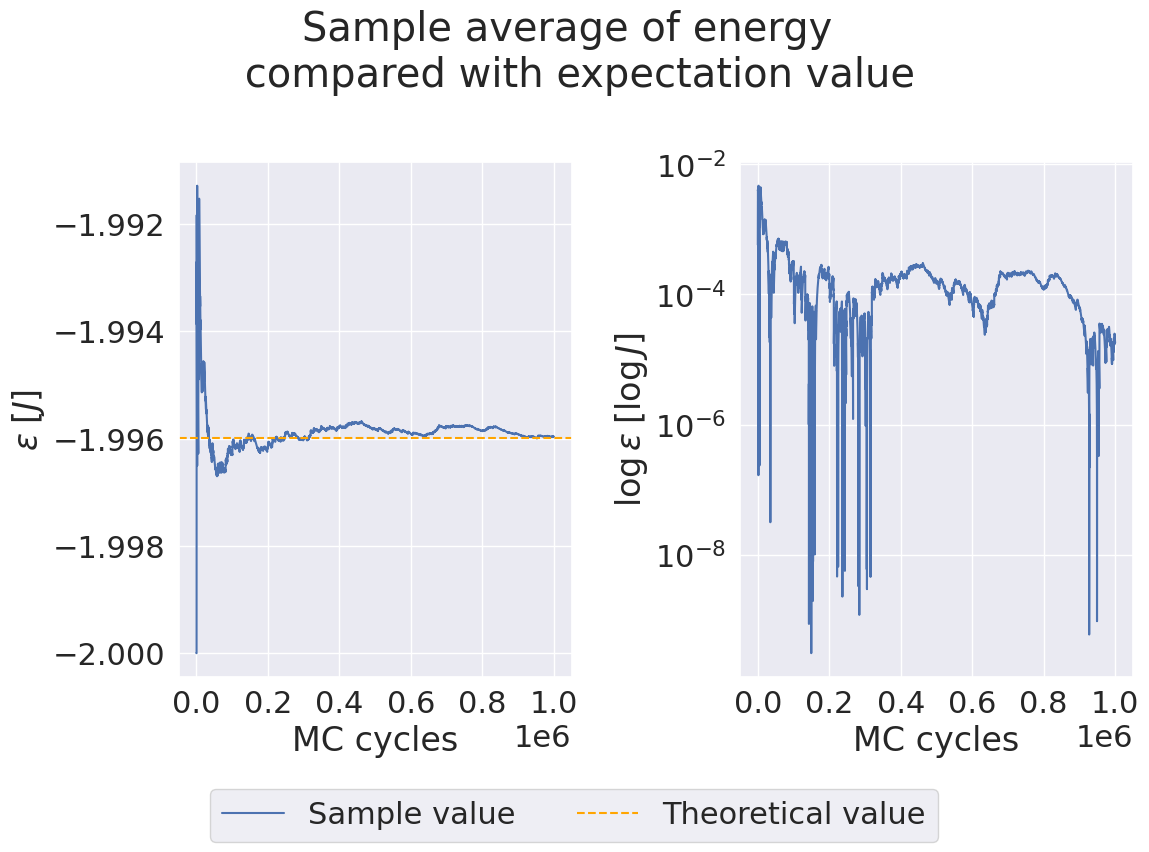

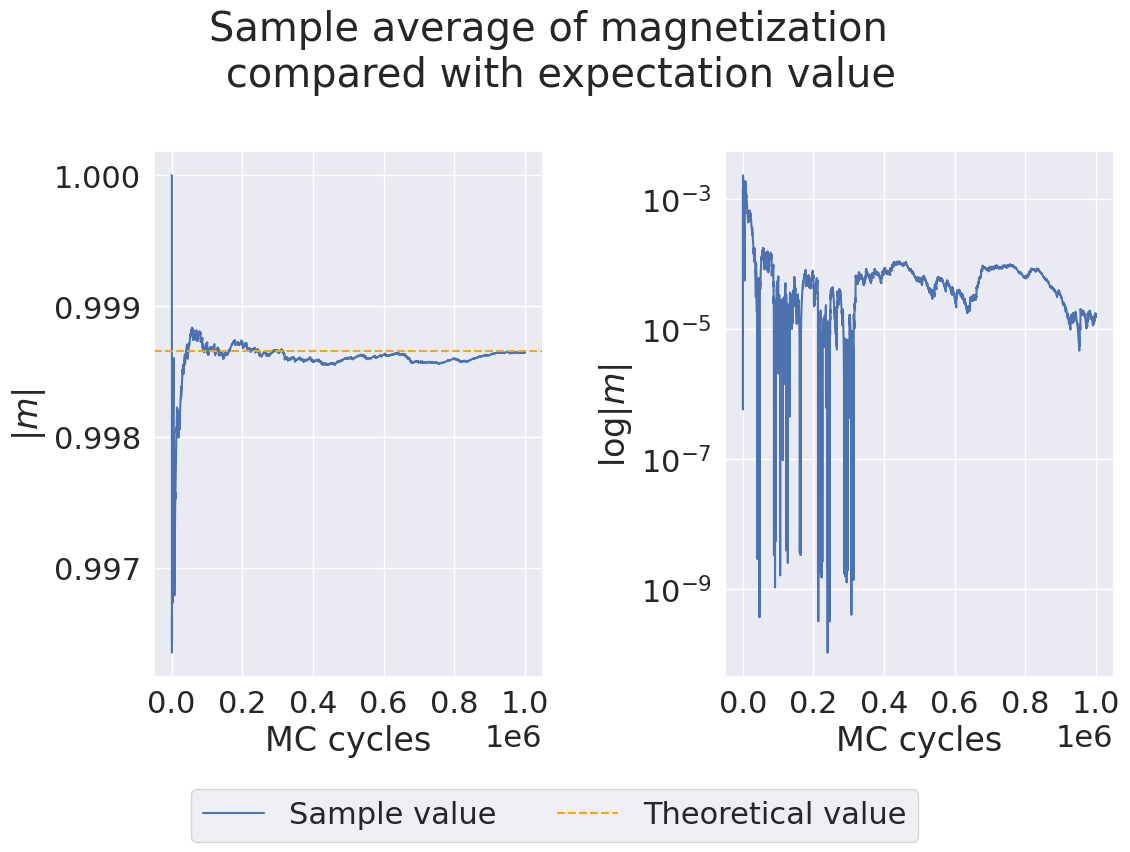

In [54]:
validation2x2 = binToDf('../output/validation2x2.bin')
T = np.mean(validation2x2.temperature)
L = validation2x2.gridsize[0]
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -8*np.sinh(8*beta)/Z
engMom2 = 32*np.cosh(8*beta)/Z
avgM = (4 + 2*np.exp(8*beta))/Z
mMom2 = (8 + 8*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
axs[0].plot(cycles, validation2x2.energy1mom/(L**2), label = 'Sample value')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical value', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\epsilon\; [J]$')

axs[1].semilogy(cycles, abs(validation2x2.energy1mom/(L**2) - avgEng))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\log \epsilon \; [\logJ]$')

fig.suptitle('Sample average of energy \n compared with expectation value')
axs[0].set_xticks(np.arange(0, 1.2e6, 0.2e6))
axs[1].set_xticks(np.arange(0, 1.2e6, 0.2e6))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.08))
plt.show()
fig.savefig('figures/avgeng.pdf', bbox_inches = 'tight')

fig, axs = plt.subplots(1, 2, figsize = (12, 8))
axs[0].plot(cycles, validation2x2.mag1mom/(L**2), label = 'Sample value')
axs[0].axhline(avgM, linestyle = '--', label = 'Theoretical value', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$|m|$')

axs[1].semilogy(cycles, abs(validation2x2.mag1mom/(L**2) - avgM))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\log |m|$')

fig.suptitle('Sample average of magnetization \n compared with expectation value')
axs[0].set_xticks(np.arange(0, 1.2e6, 0.2e6))
axs[1].set_xticks(np.arange(0, 1.2e6, 0.2e6))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.08))

fig.tight_layout()
plt.show()
fig.savefig('figures/avgmag.pdf', bbox_inches = 'tight')


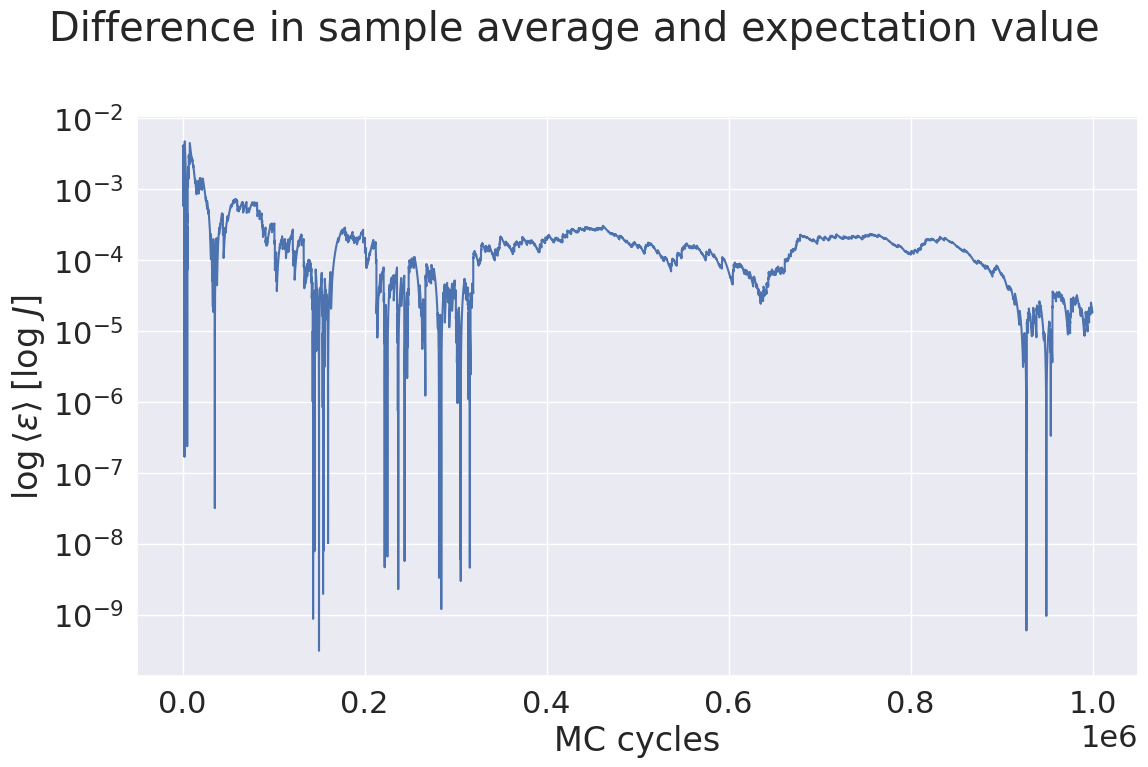

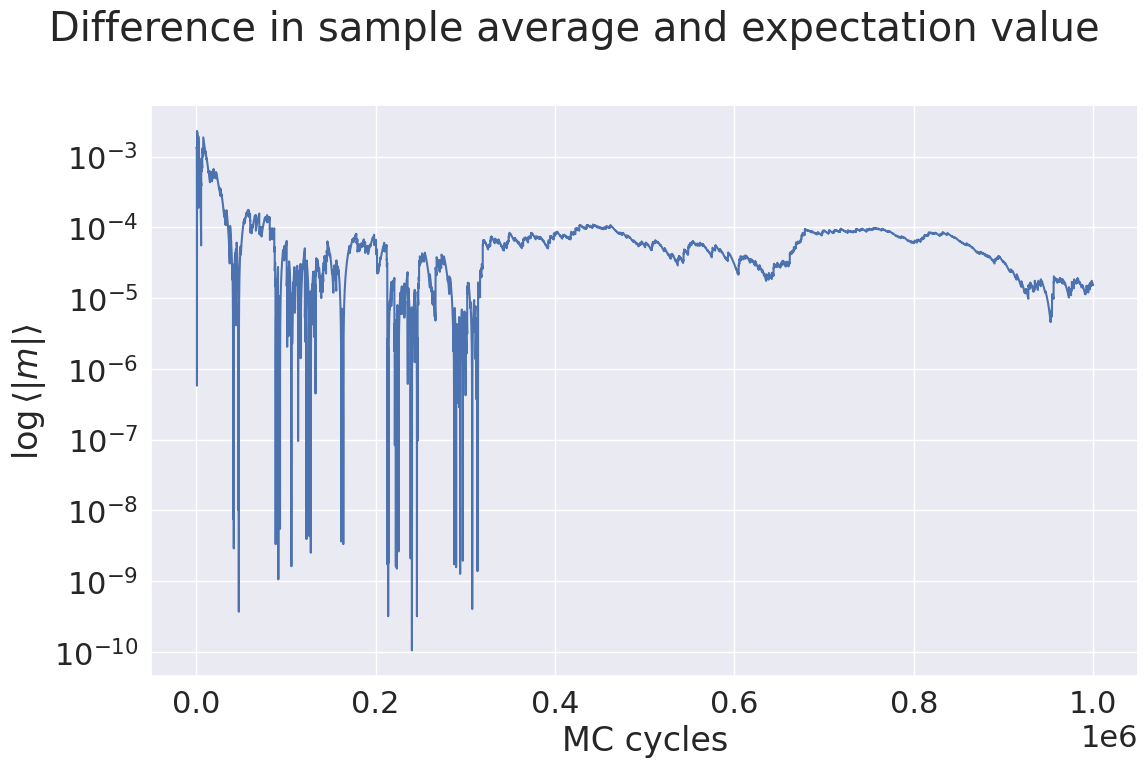

In [5]:
import tikzplotlib

validation2x2 = binToDf('../output/validation2x2.bin')
T = np.mean(validation2x2.temperature)
L = validation2x2.gridsize[0]
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -8*np.sinh(8*beta)/Z
avgM = (4 + 2*np.exp(8*beta))/Z

cycles = np.arange(0, len(validation2x2))

fig, axs = plt.subplots(1, 1, figsize = (12, 8))
axs.set_xlabel('MC cycles')
axs.set_ylabel(r'$\epsilon\; [J]$')

axs.semilogy(cycles, abs(validation2x2.energy1mom/(L**2) - avgEng))
axs.set_xlabel('MC cycles')
axs.set_ylabel(r'$\log \langle\epsilon\rangle \; [\log\,J]$')

fig.suptitle('Difference in sample average and expectation value')
axs.set_xticks(np.arange(0, 1.2e6, 0.2e6))
axs.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
fig.tight_layout()
tikzplotlib.clean_figure()
tikzplotlib.save(
            f"tex/avgeng.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()

fig, axs = plt.subplots(1, 1, figsize = (12, 8))
axs.set_xlabel('MC cycles')
axs.set_ylabel(r'$\epsilon\; [J]$')

axs.semilogy(cycles, abs(validation2x2.magnetization1mom/(L**2) - avgM))
axs.set_xlabel('MC cycles')
axs.set_ylabel(r'$\log \langle|m|\rangle$')

fig.suptitle('Difference in sample average and expectation value')
axs.set_xticks(np.arange(0, 1.2e6, 0.2e6))
axs.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
fig.tight_layout()
tikzplotlib.clean_figure()
tikzplotlib.save(
            f"tex/avgmag.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()